### Biometrics Project: Iris Detection
##### by Baudouin M. RAMAZANI


### ===========================

Use all images in “iris_matlab.zip” in the Files section.
For each image:
Use the Hough transform for circle detection (any Matlab/Python implementation you find) to calculate both boundaries of the iris (inner and outer)
To find the eyelids and subtract non-iris regions from your region of interest, calculate the eyelid boundaries using active contours (snakes); you may use any Matlab/Python implementation you find, including the code in “iris_matlab.zip” in the Files section. 
Convert the iris region into a polar coordinates representation (as in the lecture slides). 

### ===========================

##### YOUTUBE LINK: https://youtu.be/XDOmLPcyqtg


In [307]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


def check_blue(x,y):
    if (img[x][y][0]<50 and img[x][y][1]<50 and img[x][y][2]>200):
        return True
    return False


def detect_iris(iris_image,in_minRadius,in_maxRadius,out_minRadius,out_maxRadius,ro,r,co,c,skp=0):
    cimg = cv2.imread(iris_image,1)
    img = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img, 5)
    cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    #cv2.imshow("origin", cimg)
    cv2.waitKey(0)




    ###### CIRCLE
    circle_out = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=40, minRadius=out_minRadius, maxRadius=out_maxRadius)
    circle_in = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=40, minRadius=in_minRadius, maxRadius=in_minRadius)
    circle_out = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=40, minRadius=out_minRadius, maxRadius=out_maxRadius)
    circle_in = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                              param1=50, param2=40, minRadius=in_minRadius, maxRadius=in_maxRadius)
    circle_out = np.uint16(np.around(circle_out))
    circle_in = np.uint16(np.around(circle_in))



    print("* Inner circle: \n[x,y]:",circle_in[0][0][0:2],"\tInner radius",circle_in[0][0][2],"\n* Outter Circle: \n[x,y]:",circle_out[0][0][0:2],"\tOutter radius",circle_out[0][0][2],)
    
    for i in circle_in[0, :]:
        # Draw the outer circle (blue)
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

        # Draw the center of the circle (red)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
    for i in circle_out[0, :]:
        # Draw the outer circle (blue)
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

        # Draw the center of the circle (red)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)


    #cv2.imshow('detected circles', cimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    #### SNAKE

    img =cimg
    s = np.linspace(0, 2*np.pi, 400)
    r = ro + r*np.sin(s)
    c = co + c*np.cos(s)
    init = np.array([r, c]).T
    snake = active_contour(gaussian(img, 3, preserve_range=False,multichannel=True),
                           init, alpha=0.015, beta=10, gamma=0.001)

    # ==== CROP
    center_out = circle_out[0][0][0:2]
    radius_out = circle_out[0][0][2]


    theta = np.linspace(0,2*np.pi,360)
    radius_roi = radius_out* np.ones(360, dtype = float)

    def in_circle(x,y):
        return ((center_out[0]-y)**2+(center_out[1]-x)**2)**0.5<= radius_out


    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if not in_circle(i,j):
                img[i][j] = [255,255,255]

    '''for i in range(center_out[1]-radius_out, center_out[1]+radius_out):
        for j in range(center_out[0]-radius_out,center_out[0]):
            if check_blue(i,j):
                img[i][j]=[255,255,255]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if in_snake(i,j):
                for k in range(0,100):
                    img[k][j]=[1,1,1]
    '''

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap=plt.cm.gray)
#    ax.plot(init[:, 1], init[:, 0], '--w', lw=3)
    ax.plot(snake[:, 1], snake[:, 0],'.r', lw=3)

    #ax.set_xticks([]), ax.set_yticks([])
    #ax.axis([0, img.shape[1], img.shape[0], 0])

    #plt.show()
    fig.savefig('result.jpg', bbox_inches='tight', dpi=150)

    #img = cv2.imread('result.jpg',1)
    img = cv2.imread('result.jpg',1)
    img = img[18:632,65:885]
    if not skp:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if check_blue(i,j):
                    for k in range(0,i):
                        img[k][j]=[255,255,255]

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap=plt.cm.gray)
    plt.show

* Inner circle: 
[x,y]: [346 234] 	Inner radius 42 
* Outter Circle: 
[x,y]: [350 234] 	Outter radius 114


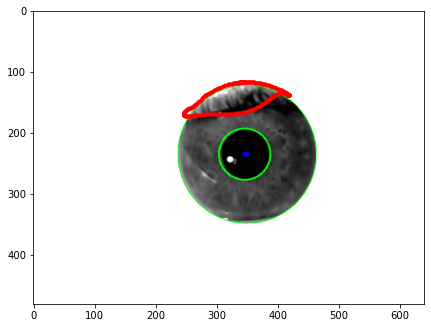

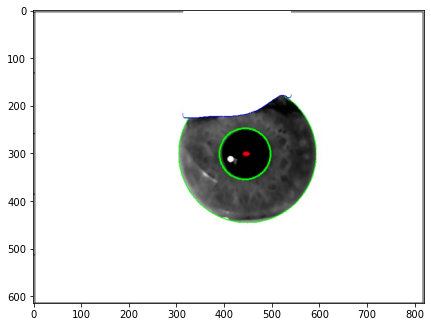

In [308]:
detect_iris('iris1.jpg',20,50,95,122,120,50,350,200)

* Inner circle: 
[x,y]: [174 162] 	Inner radius 42 
* Outter Circle: 
[x,y]: [180 154] 	Outter radius 120


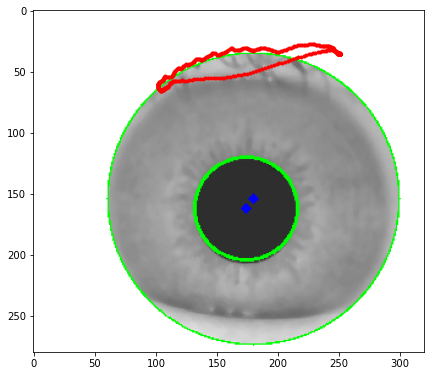

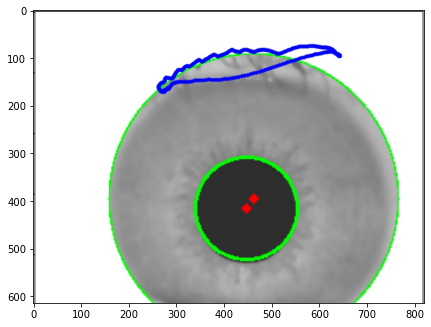

In [309]:
detect_iris('iris2.jpg',20,50,95,122,50,45,175,75,1)

* Inner circle: 
[x,y]: [284 254] 	Inner radius 45 
* Outter Circle: 
[x,y]: [280 250] 	Outter radius 103


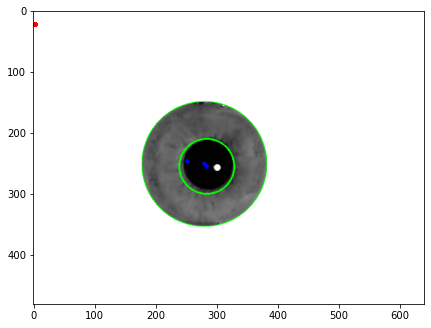

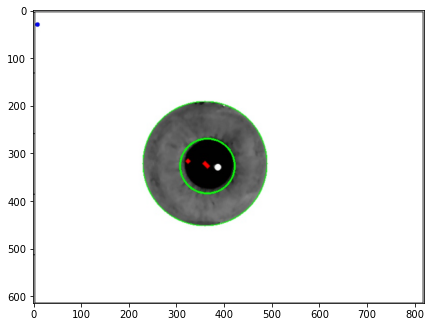

In [310]:
detect_iris('iris3.jpg',30,80,100,150,0,0,0,0,1)

* Inner circle: 
[x,y]: [150  96] 	Inner radius 24 
* Outter Circle: 
[x,y]: [156  98] 	Outter radius 64


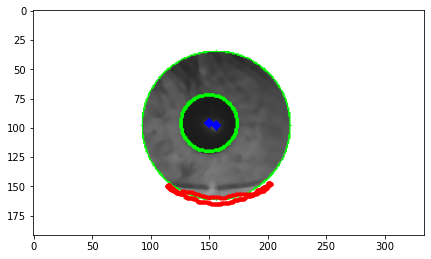

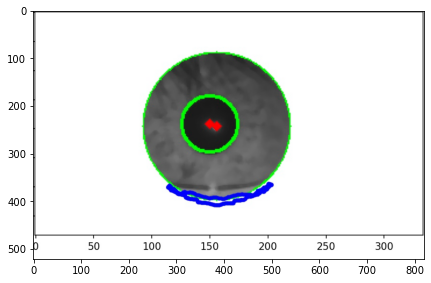

In [311]:
detect_iris('iris4.jpg',10,45,40,80,155,10,160,50,1)

* Inner circle: 
[x,y]: [358 286] 	Inner radius 49 
* Outter Circle: 
[x,y]: [358 290] 	Outter radius 108


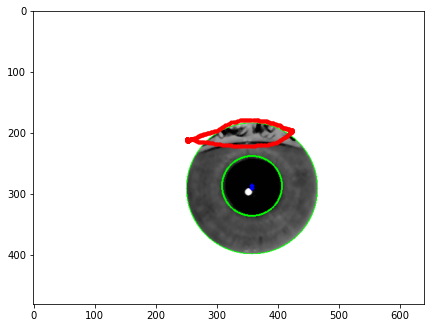

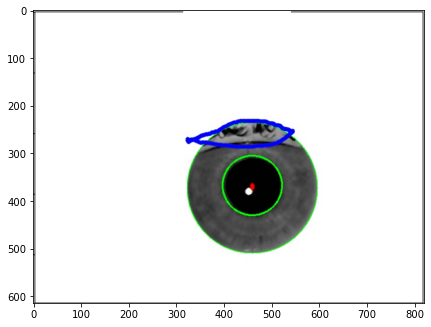

In [312]:
detect_iris('iris5.jpg',20,50,95,122,200,20,350,100)